## Problem Statement

In this assignment, students will be using the K-nearest neighbors algorithm to predict
how many points NBA players scored in the 2013-2014 season.

A look at the data
Before we dive into the algorithm, let’s take a look at our data. Each row in the data
contains information on how a player performed in the 2013-2014 NBA season.

Download 'nba_2013.csv' file from this link:
https://www.dropbox.com/s/b3nv38jjo5dxcl6/nba_2013.csv?dl=0

Here are some selected columns from the data:

player - name of the player

pos - the position of the player

g - number of games the player was in

gs - number of games the player started

pts - total points the player scored

There are many more columns in the data, mostly containing information about average
player game performance over the course of the season. See this site for an explanation
of the rest of them.

We can read our dataset in and figure out which columns are present:


### Importing libraries

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import  mean_squared_error ,r2_score
%matplotlib inline

### Reading dataset

In [52]:
with open("nba_2013.csv", 'r') as csvfile:
    nba = pd.read_csv(csvfile)

In [53]:
nba.head(5)

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [4]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
player          481 non-null object
pos             481 non-null object
age             481 non-null int64
bref_team_id    481 non-null object
g               481 non-null int64
gs              481 non-null int64
mp              481 non-null int64
fg              481 non-null int64
fga             481 non-null int64
fg.             479 non-null float64
x3p             481 non-null int64
x3pa            481 non-null int64
x3p.            414 non-null float64
x2p             481 non-null int64
x2pa            481 non-null int64
x2p.            478 non-null float64
efg.            479 non-null float64
ft              481 non-null int64
fta             481 non-null int64
ft.             461 non-null float64
orb             481 non-null int64
drb             481 non-null int64
trb             481 non-null int64
ast             481 non-null int64
stl             481 non-null int64
blk    

#### Observation:

There are many missing values.

#### Checking object datatype features

In [70]:
feature_obj = []
for i in nba.columns:
    if nba[i].dtype == 'object':
        feature_obj.append(i)

In [71]:
feature_obj

['player', 'pos', 'bref_team_id', 'season']

#### Dropping season_end and pts features 

In [72]:
feat_drop = feature_obj + ['season_end','pts']
feat_drop

['player', 'pos', 'bref_team_id', 'season', 'season_end', 'pts']

In [73]:
features = nba.drop(feat_drop,axis=1)
target = nba['pts'] 

### Check for missing values

,Total,Percent
x3p.,67,13.929314
ft.,20,4.158004
x2p.,3,0.623701
fg.,2,0.415800
efg.,2,0.415800


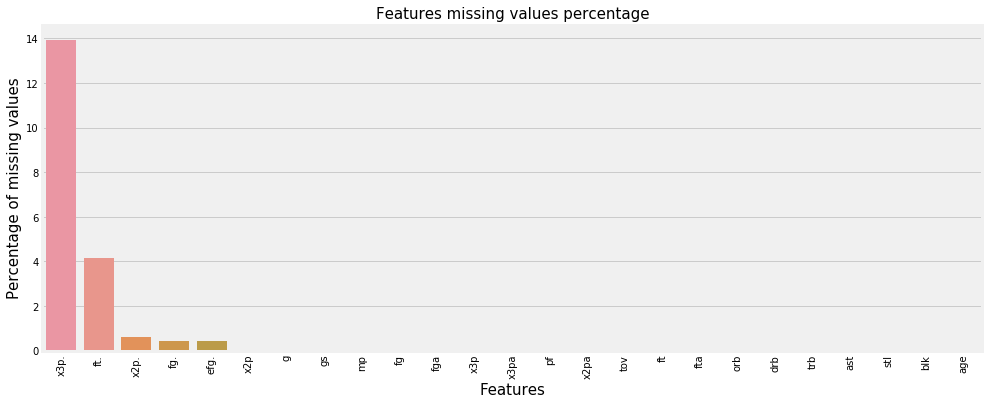

In [74]:
total = features.isnull().sum().sort_values(ascending=False)
percent = (features.isnull().sum()/features.isnull().count()).sort_values(ascending=False) * 100
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percentage of missing values', fontsize=15)
plt.title('Features missing values percentage', fontsize=15)
missing_data.head()

#### Observation:

Since, the missing data constitutes more than 5%, we cannot drop the values.

### Data Imputation:

The missing values are replaced with median.

In [77]:
imp = Imputer(missing_values="NaN", strategy='median', axis=0)
X = imp.fit_transform(features)
y= target

### Feature Splitting

In [80]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(384, 25)
(97, 25)
(384,)
(97,)


### K-Nearest Neighbour Regressor Model

In [81]:
for K in range(20):
    K_value = K+1
    neigh = KNeighborsRegressor(n_neighbors = K_value )
    neigh.fit(X_train, y_train) 
    y_pred = neigh.predict(X_test)
    print("RMSE is ",np.sqrt(mean_squared_error(y_pred, y_test))," for K-Value:",K_value)

RMSE is  97.6498583990823  for K-Value: 1
RMSE is  79.36682419944214  for K-Value: 2
RMSE is  66.82016692514155  for K-Value: 3
RMSE is  68.84860782157524  for K-Value: 4
RMSE is  69.08064016322392  for K-Value: 5
RMSE is  72.23579064543989  for K-Value: 6
RMSE is  64.65608087756026  for K-Value: 7
RMSE is  68.2304076708313  for K-Value: 8
RMSE is  66.33260517539406  for K-Value: 9
RMSE is  68.72991740422619  for K-Value: 10
RMSE is  70.19574622272484  for K-Value: 11
RMSE is  68.52099838267488  for K-Value: 12
RMSE is  71.10997554473488  for K-Value: 13
RMSE is  72.55504342007549  for K-Value: 14
RMSE is  76.38729196289768  for K-Value: 15
RMSE is  79.8161605373577  for K-Value: 16
RMSE is  80.68945872277509  for K-Value: 17
RMSE is  83.40034094838423  for K-Value: 18
RMSE is  84.35710994271165  for K-Value: 19
RMSE is  85.68827179188767  for K-Value: 20


#### Observation:

We find that the RMSE value is lowest for K-value 7.

### Building model with K-value 7

In [82]:
K_value = 7
neigh = KNeighborsRegressor(n_neighbors = K_value)
neigh.fit(X_train, y_train) 
y_pred = neigh.predict(X_test)


RMSE for KNN Regressor is  64.65608087756026  for K-Value: 7
R Squared for KNN Regressor is  0.9781723372025835


### Evaluation metrics:


In [83]:
print("RMSE for KNN Regressor is ",np.sqrt(mean_squared_error(y_pred,y_test))," for K-Value:",K_value)
print("R Squared for KNN Regressor is ",r2_score(y_test,y_pred))

RMSE for KNN Regressor is  64.65608087756026  for K-Value: 7
R Squared for KNN Regressor is  0.9781723372025835


### Actual Rating vs Predicted Rating

Text(0.5,1,'Actual vs Predicted points')

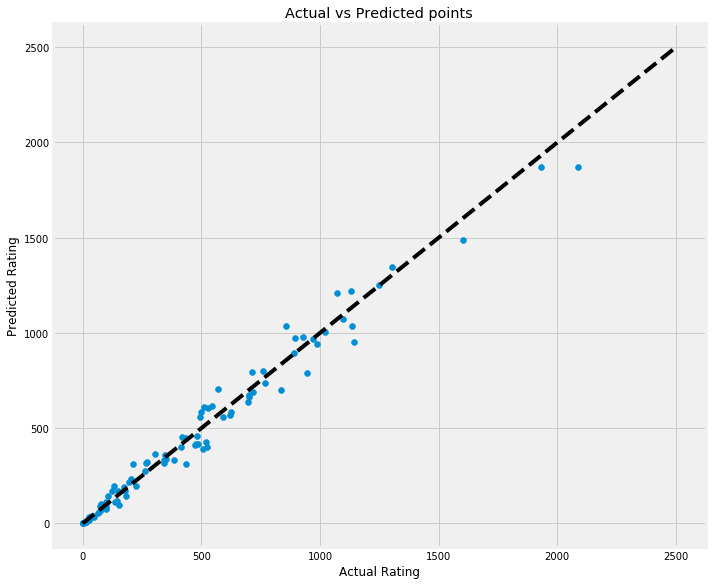

In [84]:
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred)
plt.plot([0, 2500], [0, 2500], '--k')
plt.axis('tight')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.tight_layout()
plt.title("Actual vs Predicted points")

### Random Forest Regressor Model

In [85]:
from sklearn.ensemble import RandomForestRegressor
RFreg = RandomForestRegressor(random_state=0)
RFreg.fit(X_train,y_train)
y_pred = RFreg.predict(X_test)


### Evaluation metrics

In [86]:
print("RMSE for Random Forest Regressor is ",np.sqrt(mean_squared_error(y_pred,y_test)))
print("R Squared for Random Forest Regressor is ",r2_score(y_test,y_pred))

RMSE for Random Forest Regressor is  48.33525532379544
R Squared for Random Forest Regressor is  0.9878012166769131


### Actual Rating vs Predicted Rating plot for Random Regressor Plot

Text(0.5,1,'Actual vs Predicted points- Random Forest Regressor')

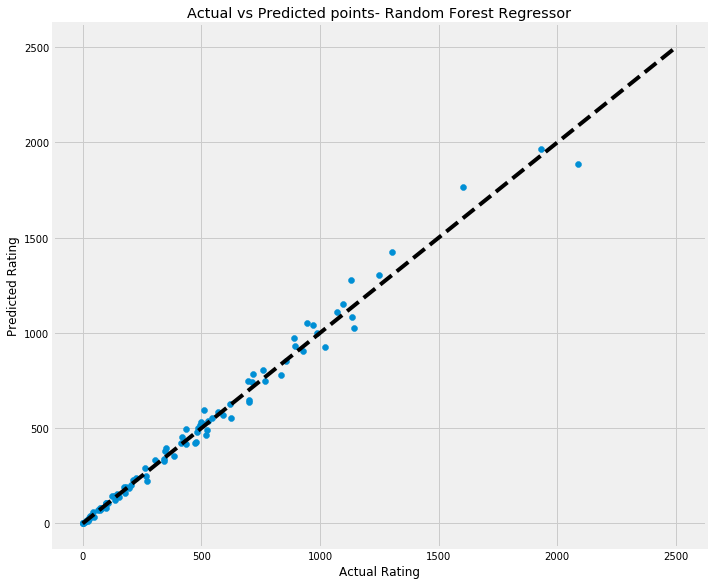

In [69]:
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred)
plt.plot([0, 2500], [0, 2500], '--k')
plt.axis('tight')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.tight_layout()
plt.title("Actual vs Predicted points- Random Forest Regressor")

## Conclusion:

1. Accuracy for KNN was found to be 97.8% with RMSE 64.65.

2. Accuracy for KNN with Random Forest Regressor was found to be 98.7% with RMSE 48.33%.